# **Regression Assignment**

---
## 1. What is Simple Linear Regression?

**Simple Linear Regression** is a statistical method used in Machine Learning to model the relationship between **two variables**:

* **Independent variable ($X$)** – the input or predictor.
* **Dependent variable ($Y$)** – the output or target.

The goal is to **fit a straight line** through the data points such that it best predicts the value of $Y$ from $X$.

### 🧮 Mathematical Equation:

$$
Y = mX + c
$$

Where:

* $Y$: Predicted output (dependent variable)
* $X$: Input feature (independent variable)
* $m$: Slope of the line (how much Y changes for a unit change in X)
* $c$: Intercept (value of Y when X = 0)

### 📊 Example:

Predicting **student marks (Y)** based on **hours studied (X)**.

### ✅ Assumptions:

1. Linear relationship between X and Y
2. Homoscedasticity (constant variance of errors)
3. Errors are normally distributed
4. Independence of observations

### 📌 Python Code Example:

```python
from sklearn.linear_model import LinearRegression
import numpy as np

# Example data
X = np.array([[1], [2], [3], [4], [5]])  # Hours studied
y = np.array([2, 4, 5, 4, 5])            # Marks scored

# Create and train model
model = LinearRegression()
model.fit(X, y)

# Predict
predictions = model.predict(X)

# Output slope and intercept
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)
```

---
## 2. What are the key assumptions of Simple Linear Regression?

### 1. **Linearity**

There should be a **linear relationship** between the independent variable (X) and the dependent variable (Y).

* You can check this using a **scatter plot** of X vs Y.

### 2. **Independence of Errors**

The residuals (errors) should be **independent**.

* In time series, this means no autocorrelation.
* Tested using **Durbin-Watson test**.

### 3. **Homoscedasticity** (Constant Variance of Errors)

The variance of residuals should be **constant across all levels of X**.

* Violations can be seen using a **residuals vs fitted values plot**.
* If variance increases or decreases with X, it indicates **heteroscedasticity**.

### 4. **Normality of Errors**

The residuals (not the Y values!) should be **normally distributed**.

* Checked using **histogram**, **Q-Q plot**, or **Shapiro-Wilk test**.
* Important for valid **confidence intervals** and **hypothesis testing**.

### 5. **No Multicollinearity** (Not a concern in Simple Linear Regression)

* This applies mainly to **Multiple Linear Regression**, where predictors should not be too correlated with each other.
* In **Simple Linear Regression**, there's only one predictor, so multicollinearity doesn’t apply.

---
## 3. What is heteroscedasticity, and why is it important to address in regression models?

**Heteroscedasticity** occurs when the **variance of residuals (errors)** is **not constant** across all levels of the independent variable(s) in a regression model.

#### **In Simple Terms:**

Instead of the errors being spread out **evenly** (homoscedastic), they become **wider** or **narrower** as the value of X increases or decreases.

### 🔍 Visual Example:

In a **residuals vs predicted values** plot:

* **Homoscedasticity** → residuals spread out evenly (random cloud).
* **Heteroscedasticity** → residuals fan out or form patterns (like a cone or curve).

### ⚠️ Why is Heteroscedasticity a Problem?

1. **Invalid standard errors**
   → Leads to **incorrect confidence intervals** and **p-values**.

2. **Biased statistical tests**
   → Makes hypothesis testing unreliable.

3. **Reduced model accuracy**
   → Especially if heteroscedasticity is severe.

### 🛠 How to Detect Heteroscedasticity:

* **Residuals vs Fitted Plot** (look for patterns)
* **Breusch-Pagan test** or **White test** (statistical tests)

### ✅ How to Fix It:

1. **Log or square root transformation** of the dependent variable
2. Use **Weighted Least Squares (WLS)** instead of OLS
3. Apply **robust standard errors** (e.g., via `statsmodels` in Python)

### 🔍 Quick Python Example:

```python
import statsmodels.api as sm
import statsmodels.stats.api as sms

# Breusch-Pagan test for heteroscedasticity
_, pval, _, _ = sms.het_breuschpagan(residuals, sm.add_constant(X))
print("P-value for Breusch-Pagan test:", pval)
```

If `p-value < 0.05`, heteroscedasticity is likely present.

---
## 4. What is Multiple Linear Regression?

**Multiple Linear Regression** is an extension of **Simple Linear Regression** that models the relationship between **one dependent variable (Y)** and **two or more independent variables (X₁, X₂, ..., Xₙ)**.

### 🧮 Mathematical Equation:

$$
Y = b_0 + b_1X_1 + b_2X_2 + \cdots + b_nX_n + \epsilon
$$

Where:

* $Y$: Dependent (target) variable
* $X_1, X_2, ..., X_n$: Independent (predictor) variables
* $b_0$: Intercept
* $b_1, b_2, ..., b_n$: Coefficients (slopes) for each predictor
* $\epsilon$: Error term

### 📊 Example Use Case:

Predicting **house price (Y)** based on:

* Size of house (X₁)
* Number of bedrooms (X₂)
* Distance to city center (X₃)
* Age of the house (X₄)

### ✅ Key Assumptions (Same as Simple Linear Regression + 1 Extra):

1. **Linearity**
2. **Independence of errors**
3. **Homoscedasticity**
4. **Normality of residuals**
5. **No multicollinearity** – Predictors should not be highly correlated with each other

### 📌 Python Code Example:

```python
from sklearn.linear_model import LinearRegression
import numpy as np

# Features: [size, bedrooms, age]
X = np.array([
    [1200, 3, 5],
    [1500, 4, 10],
    [1800, 3, 2]
])
y = np.array([300000, 350000, 400000])  # House prices

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict
new_data = np.array([[1600, 3, 7]])
prediction = model.predict(new_data)

print("Predicted Price:", prediction[0])
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
```

---
## 5. What is polynomial regression, and how does it differ from linear regression?

**Polynomial Regression** is a type of regression technique that models the relationship between the **independent variable (X)** and the **dependent variable (Y)** as an **nth-degree polynomial**.

It allows for **curved relationships** between the input and output.

### 🧮 Polynomial Regression Equation (degree 2 example):

$$
Y = b_0 + b_1X + b_2X^2 + \epsilon
$$

Where:

* $X^2$: Squared term of the input
* $b_0, b_1, b_2$: Coefficients learned by the model

### 🔁 How It Differs from **Linear Regression**:

| Feature            | Linear Regression                   | Polynomial Regression              |
| ------------------ | ----------------------------------- | ---------------------------------- |
| Relationship       | Linear (straight line)              | Non-linear (curve or wave)         |
| Equation           | $Y = b_0 + b_1X$                    | $Y = b_0 + b_1X + b_2X^2 + \ldots$ |
| Fit on curved data | Poor fit                            | Better fit                         |
| Underfitting risk  | Higher (if true relation is curved) | Lower                              |
| Overfitting risk   | Low                                 | Higher (if degree is too high)     |

### 📊 When to Use Polynomial Regression:

* When a scatter plot shows a **non-linear pattern**.
* When residuals of a linear model show a **curved trend**.

### 📌 Python Code Example:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([1, 4, 9, 16, 25])  # Perfect square relationship

# Transform features to polynomial degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_poly, y)

# Predict
y_pred = model.predict(X_poly)

# Plot
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Polynomial Fit')
plt.legend()
plt.show()
```

---
## 6. Implement a Python program to fit a Simple Linear Regression model to the following sample data:

```python
X = [1, 2, 3, 4, 5]
Y = [2.1, 4.3, 6.1, 7.9, 10.2]
```

### Plot the regression line over the data points.

Slope (m): 1.9800000000000004
Intercept (c): 0.17999999999999794


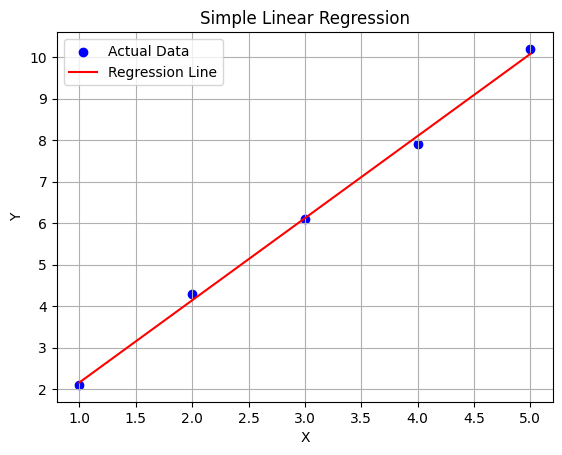

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Reshaped for sklearn
y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Print slope and intercept
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

# Plot the data points
plt.scatter(X, y, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Regression Line')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

### Output:

* **Blue dots** → Actual data points
* **Red line** → Best-fit regression line

---
## 7. Fit a Multiple Linear Regression model on this sample data:

```python
Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]
```

### Check for multicollinearity using VIF and report the results.

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Step 1: Sample Data
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}

df = pd.DataFrame(data)

# Step 2: Independent and dependent variables
X = df[['Area', 'Rooms']]
y = df['Price']

# Step 3: Fit Linear Regression model
model = LinearRegression()
model.fit(X, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Step 4: Calculate VIF (add constant for statsmodels)
X_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)

Coefficients: [   63.15789474 34736.84210526]
Intercept: 103157.89473684214

Variance Inflation Factor (VIF):
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


This means the regression equation is:

$$
\text{Price} = 103157.89 + 63.16 \times \text{Area} + 34736.84 \times \text{Rooms}
$$

### Interpretation:

* **Intercept (103157.89)**: Base price when both Area and Rooms are 0 (not meaningful in real life, but necessary for the model).
* **Area coefficient (63.16)**: For every 1 sq. ft increase in area, the predicted price increases by ₹63.16.
* **Rooms coefficient (34736.84)**: For each additional room, the predicted price increases by ₹34,736.84, holding area constant.

### ✅ VIF Interpretation:

* **VIF < 5**: No multicollinearity
* **VIF 5–10**: Moderate multicollinearity → ⚠️ **Monitor**
* **VIF > 10**: High multicollinearity → ❌ **Problematic**

#### In this case:

* **Area** and **Rooms** both have VIF ≈ 7.74 → There is **moderate multicollinearity**.
* This suggests **Area and Rooms are correlated** — which makes sense because larger homes tend to have more rooms.

### 🔧 What Can You Do?

1. ✅ **Acceptable if VIF < 10** – For small datasets, some multicollinearity is tolerable.
2. 📉 **Remove one of the correlated predictors** (if model interpretability is more important).
3. ⚙️ **Use Principal Component Analysis (PCA)** if you have more features and want to reduce dimensionality.
4. 🔍 **Check correlation matrix**:

   ```python
   print(df[['Area', 'Rooms']].corr())
   ```

---
## 8. Implement polynomial regression on the following data:

```python
X = [1, 2, 3, 4, 5]
Y = [2.2, 4.8, 7.5, 11.2, 14.7]
```

### Fit a 2nd-degree polynomial and plot the resulting curve.

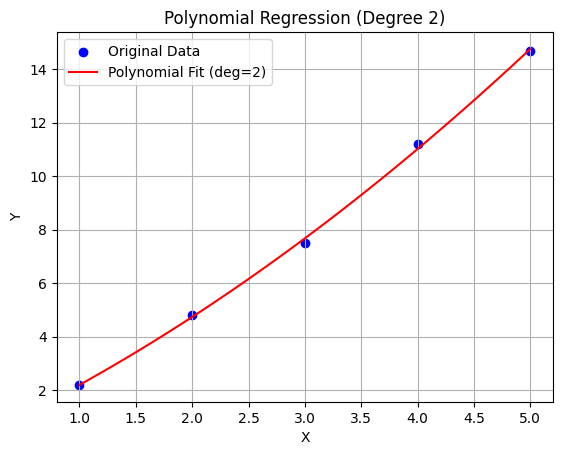

Coefficients: [0.   1.94 0.2 ]
Intercept: 0.06000000000000938


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 1: Define data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Step 2: Transform features to polynomial (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Step 3: Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Step 4: Predict values for a smooth curve
X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred = model.predict(X_range_poly)

# Step 5: Plotting
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X_range, y_pred, color='red', label='Polynomial Fit (deg=2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Print equation
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

### Output:

* **Blue dots** → Original data points
* **Red curve** → Smooth quadratic curve fit by the model

---
## 9. Create a residuals plot for a regression model trained on this data:

```python
X = [10, 20, 30, 40, 50]
Y = [15, 35, 40, 50, 65]
```

### Assess heteroscedasticity by examining the spread of residuals.

Here's a complete Python program to:

1. Fit a **Simple Linear Regression** model to the given data
2. Compute and plot the **residuals**
3. Visually assess **heteroscedasticity**

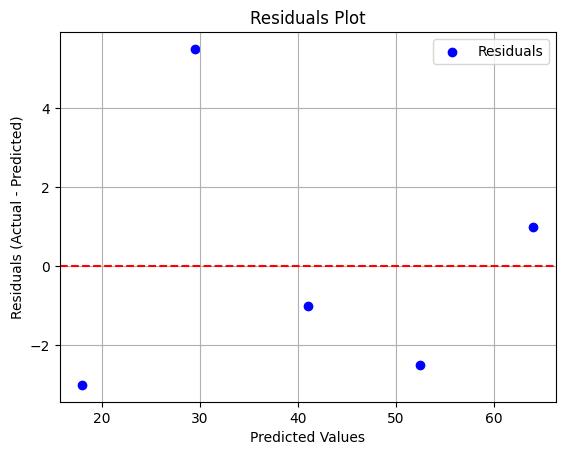

Predicted values: [18.  29.5 41.  52.5 64. ]
Residuals: [-3.   5.5 -1.  -2.5  1. ]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Define the data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
y = np.array([15, 35, 40, 50, 65])

# Step 2: Fit the regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Predict and calculate residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Step 4: Plot residuals
plt.scatter(y_pred, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot')
plt.grid(True)
plt.legend()
plt.show()

# Step 5: Optional - print residuals
print("Predicted values:", y_pred)
print("Residuals:", residuals)



### 🔍 How to Interpret the Residuals Plot:

* If the residuals are **randomly scattered around zero** → ✅ **No heteroscedasticity** (homoscedastic).
* If the **spread increases or decreases** with predicted values → ❌ **Heteroscedasticity detected**.
* Look for **funnel shapes** or **curves** in the scatter plot.

Here's how you can perform the **Breusch–Pagan test** to **statistically detect heteroscedasticity** in your regression model.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.linear_model import LinearRegression

# Step 1: Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
y = np.array([15, 35, 40, 50, 65])

# Step 2: Fit regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

# Step 3: Breusch–Pagan test using statsmodels
X_sm = sm.add_constant(X)  # Add intercept for statsmodels
ols_model = sm.OLS(y, X_sm).fit()
bp_test = het_breuschpagan(ols_model.resid, X_sm)

# Step 4: Output test results
labels = ['Lagrange multiplier statistic', 'p-value', 
          'f-value', 'f p-value']
for name, val in zip(labels, bp_test):
    print(f"{name}: {val}")

Lagrange multiplier statistic: 1.3654789844249975
p-value: 0.24259017808438854
f-value: 1.1270912826533521
f p-value: 0.36628923988686174


### 📊 Interpreting the Breusch–Pagan Test:

* **p-value < 0.05** → ❌ Reject null hypothesis → **Heteroscedasticity is present**
* **p-value ≥ 0.05** → ✅ Fail to reject null → **No evidence of heteroscedasticity**

---
## 10. Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

#### Step-by-Step Plan:

### ✅ 1. **Understand the Data Deeply**

* Examine **pairplots**, **correlation matrices**, and **scatter plots** to visually explore patterns.
* Understand the **business logic** — e.g., *larger homes tend to have more rooms* → expected correlation.

#### 🔁 Issue 1: **Multicollinearity**

##### **How to Detect**:

* **Variance Inflation Factor (VIF)** > 5 or 10
* High **correlation coefficient** between predictors

##### **How to Fix**:

**A. Remove one of the correlated features**
E.g., if **Area** and **Rooms** are highly correlated, drop the one with **less predictive power**.

**B. Combine features**
Create a **composite variable**, like `Area per Room`, to reduce redundancy.

**C. Dimensionality reduction using PCA**
Principal Component Analysis (PCA) transforms correlated variables into a set of uncorrelated components.

**D. Use Regularization**
Switch to **Ridge Regression** (L2) or **Lasso Regression** (L1), which penalize high coefficients and reduce multicollinearity's effect.

```python
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X, y)
```

#### 📉 Issue 2: **Heteroscedasticity**

##### **How to Detect**:

* **Residuals vs Predicted** plot shows a funnel/pattern
* **Breusch–Pagan test** confirms non-constant variance

##### **How to Fix**:

**A. Transform the Target Variable (Y)**
Apply a **log**, **sqrt**, or **Box-Cox** transformation to stabilize variance:

```python
import numpy as np
y_transformed = np.log(y)
```

**B. Use Weighted Least Squares (WLS)**
Assign lower weights to observations with higher variance.

```python
import statsmodels.api as sm
weights = 1 / (residuals**2)
model = sm.WLS(y, sm.add_constant(X), weights=weights).fit()
```

**C. Use Robust Standard Errors**
Useful when heteroscedasticity is present but can't be easily fixed.

```python
model = sm.OLS(y, sm.add_constant(X)).fit(cov_type='HC3')
```

### 🧪 3. **Validate the Final Model**

* **Residuals Plot** → Should now show no pattern
* **R² and Adjusted R²** → Still strong?
* **Cross-validation (CV)** → Is performance stable on unseen data?

### 📦 4. **Deploy and Monitor**

* Deploy the model with **version control**.
* Periodically check for **data drift** or **concept drift** (especially for categorical features like location).
* Monitor prediction errors in real-world usage to detect **re-emerging heteroscedasticity** or **feature shift**.

### ✅ Summary:

| Problem            | Solution Strategy                                   |
| ------------------ | --------------------------------------------------- |
| Multicollinearity  | Drop features, combine them, use PCA or Ridge/Lasso |
| Heteroscedasticity | Transform Y, use WLS, or robust errors              |
